1. Linear regression on the start-up dataset. Download the start-up dataset from
Brightspace and analyse it in Python. The goal is to do multi-linear regression to predict
the profit of a start-up based on the features in the dataset.
Your investigation should include answering the following question:
(a) How many samples does this dataset have?
(b) Are there any missing values in the dataset?
(c) Is linear regression a suitable method for this dataset at all?
Note that there are some categorical features in the dataset. These would need to be
converted to numerical data first!
For the linear regression, use 80% of the data for training and 20% for testing. Visu-
alize the predictions and assess whether the model works well on the test data, e.g., by
computing the R2-score

In [1]:
# Libraries imported
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix, r2_score, accuracy_score

In [2]:
# Mount drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
from pickle import TRUE
file_path = '/content/drive/MyDrive/StartUpProfits.csv'
# Reading dataset 
df = pd.read_csv(file_path)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [39]:
# checking for the shape of the data
print(df.shape)


(50, 7)


In [4]:
df['State'].nunique()

3

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# checking for missing values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
# convert categorical variable (state) to numerical data using one hot encoding
# create a one-hot encoded version of column 'State'
state_one_hot = pd.get_dummies(df['State'])

# drop the original column 'State'
df = df.drop('State', axis=1)

# add the one-hot encoded version of column 'State' to the dataset
df = pd.concat([df, state_one_hot], axis=1)
df

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0
5,131876.90,99814.71,362861.36,156991.12,0,0,1
6,134615.46,147198.87,127716.82,156122.51,1,0,0
7,130298.13,145530.06,323876.68,155752.60,0,1,0
8,120542.52,148718.95,311613.29,152211.77,0,0,1
9,123334.88,108679.17,304981.62,149759.96,1,0,0


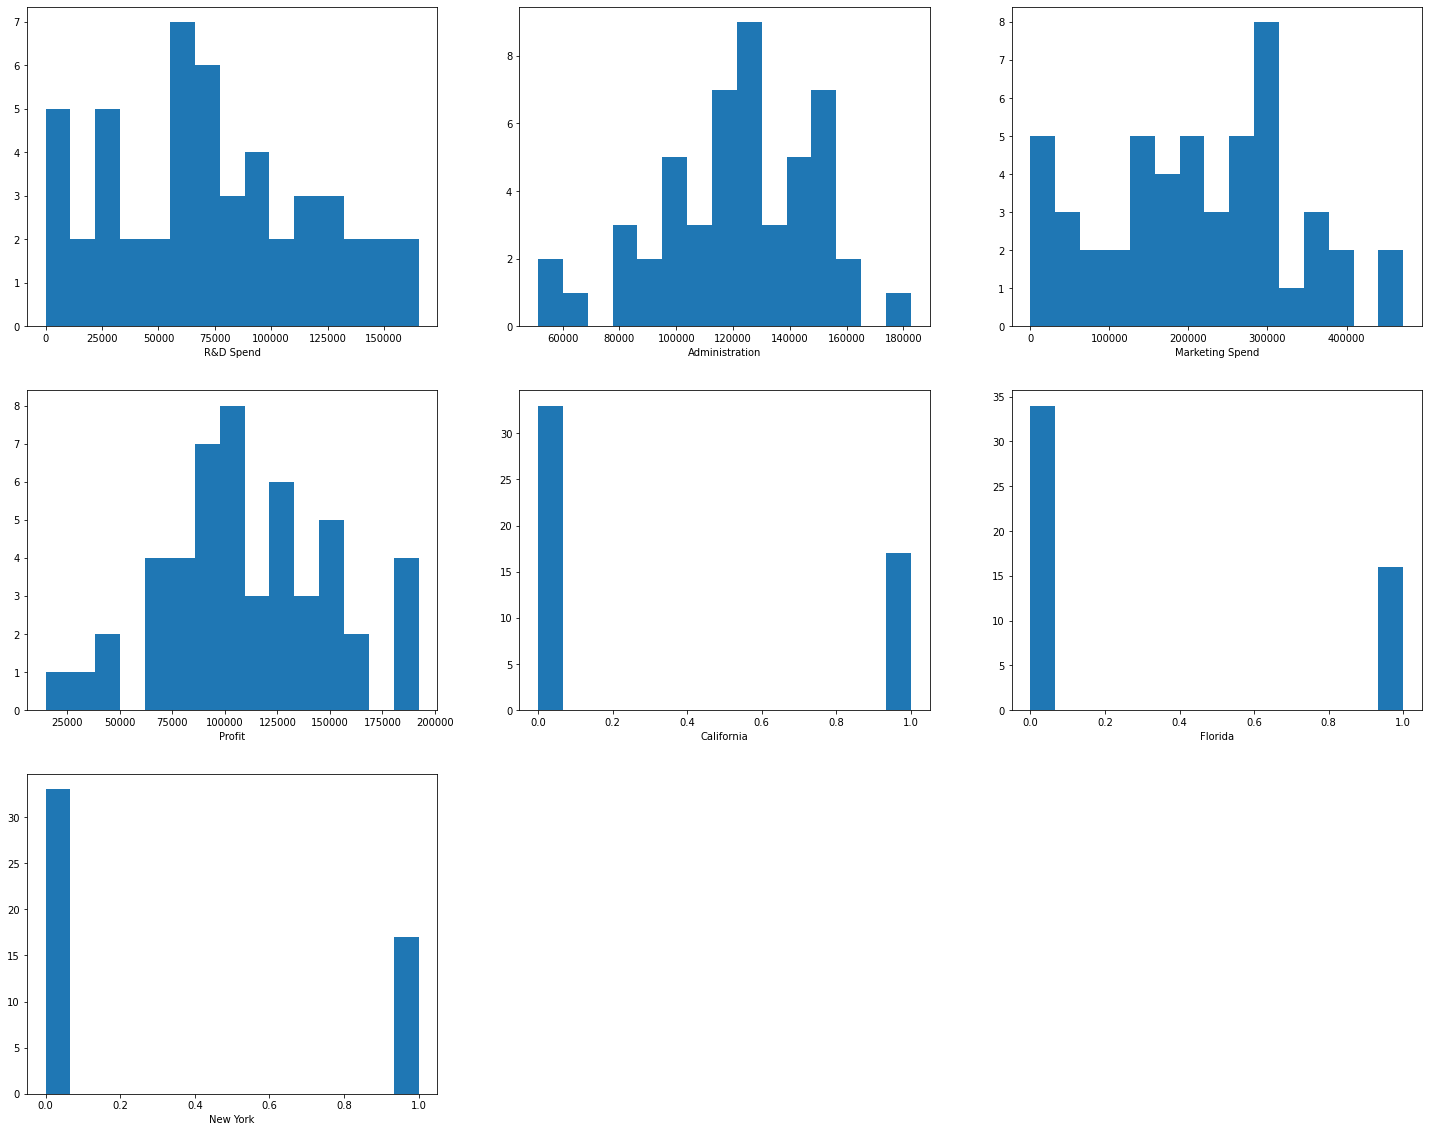

In [9]:
# Set the current plot number to 1
plot_num = 1
plt.figure(figsize=(25,20))

# Iterate through the columns of the dataframe
for col in df.columns:
    # Create a subplot in a 4x3 grid
    plt.subplot(3, 3, plot_num)
    # Create a histogram for the current column
    plt.hist(df[col], bins=15)
    # Label the x-axis with the column name
    plt.xlabel(col)
    # Increment the current plot number
    plot_num += 1

# Display the subplots
plt.show()


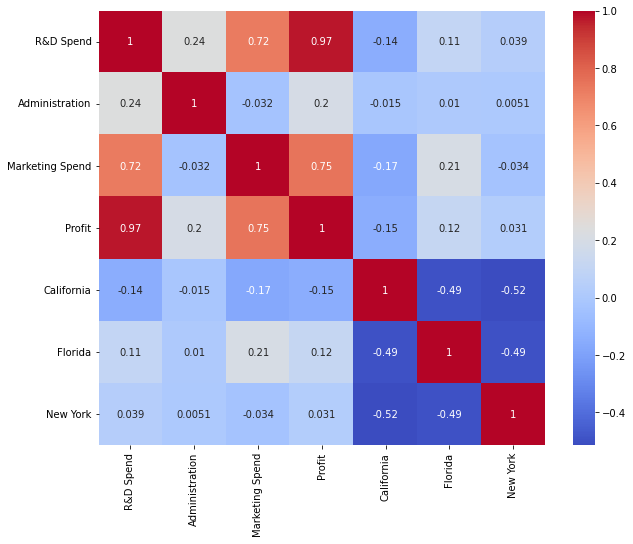

In [10]:
# checking for the correlation between profit and other features. A positive correlation indicates a direct relationship meanwhile a negative correlation indicates an inverse relationship
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [11]:
y = df['Profit']
X = df[['R&D Spend', 'Administration', 'Marketing Spend', 'California', 'Florida', 'New York']]
print(X)
print(y)

    R&D Spend  Administration  Marketing Spend  California  Florida  New York
0   165349.20       136897.80        471784.10           0        0         1
1   162597.70       151377.59        443898.53           1        0         0
2   153441.51       101145.55        407934.54           0        1         0
3   144372.41       118671.85        383199.62           0        0         1
4   142107.34        91391.77        366168.42           0        1         0
5   131876.90        99814.71        362861.36           0        0         1
6   134615.46       147198.87        127716.82           1        0         0
7   130298.13       145530.06        323876.68           0        1         0
8   120542.52       148718.95        311613.29           0        0         1
9   123334.88       108679.17        304981.62           1        0         0
10  101913.08       110594.11        229160.95           0        1         0
11  100671.96        91790.61        249744.55           1      

In [12]:
# splitting the data set into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the R2 score for the training set
r2_train = r2_score(y_train, y_train_pred)
print("R2 Score on Training Data: ", r2_train)


y_pred = model.predict(X_test)


# calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score on Testing data: ", r2)

R2 Score on Training Data:  0.9501638048821935
R2 Score on Testing data:  0.9438509847887948


- It means that 94.38% of the variance of the dependent variable can be explained by the independent variables. It indicates that the model is a good fit to the data and it's able to make accurate predictions.
- The R2 scores for training and testing data are very close which is a good sign that the model is not overfitting. This suggests that the model is able to make predictions that are in line with the actual values, both on the data it has seen (training data) and on data it hasn't seen before (testing data).

QUESTION 2:

Logistic regression on the Titanic dataset. Download the Titanic dataset from
Brightspace and analyse it in Python. The goal is to predict the probability of survival
of the passenger as a function of gender, class, etc.
To complete this task, answer the following questions:
(a) Are there any missing values in the dataset? If so, what would be the most appropriate
way of dealing with them?
(b) Have there been more male or more female survivors? What about the influence on
which class the passengers travelled in?
(c) Which features of the dataset do you think need to be included for predicting the
survival of a passenger (to answer this question quantitatively, you could train various
models with a subset of the given features)?
What is the final accuracy of your model, again using a 80%/20% split for training/test
data. Are there any other verification measures you think would be meaningful here (e.g.
precision, recall, etc.)?

In [13]:

file_pathtrain = '/content/drive/MyDrive/TitanicTrain.csv'
file_pathtest = '/content/drive/MyDrive/TitanicTest.csv'

# Reading dataset 
train = pd.read_csv(file_pathtrain)
test = pd.read_csv(file_pathtest)

# printing the first five rows of our titanic training data 
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
#  printing the first five rows of our titanic testing data 
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
# checking for the shape of the data
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [16]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

In [18]:
# checking for the number of unique values in each variable
print(train.nunique())
print(test.nunique())


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64
PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64


In [19]:
# checking for missing values in the data
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
combined = pd.concat([train, test])
combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
# dropping PassengerId, Name, Ticket and Cabin columns
combined = combined.drop(columns=["PassengerId", "Name", "Cabin", "Ticket", "Embarked"])
combined.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3,male,22.0,1,0,7.2500
1,1.0,1,female,38.0,1,0,71.2833
2,1.0,3,female,26.0,0,0,7.9250
3,1.0,1,female,35.0,1,0,53.1000
4,0.0,3,male,35.0,0,0,8.0500


In [22]:
# replacing the male and female categories in the Sex column with 1 and 0 respectively
combined['Sex'].replace({'male': 1, 'female': 0}, inplace=True)
combined.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3,1,22.0,1,0,7.2500
1,1.0,1,0,38.0,1,0,71.2833
2,1.0,3,0,26.0,0,0,7.9250
3,1.0,1,0,35.0,1,0,53.1000
4,0.0,3,1,35.0,0,0,8.0500


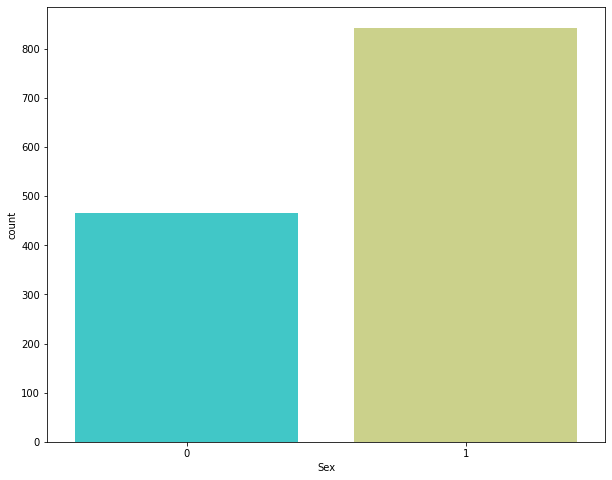

In [23]:
# plot showing the count of males(1) and females(0) in the merged train and test set
plt.figure(figsize=(10,8))
sns.countplot(x='Sex',data= combined, palette='rainbow')

According to the chart, we can see that there are more men than women.

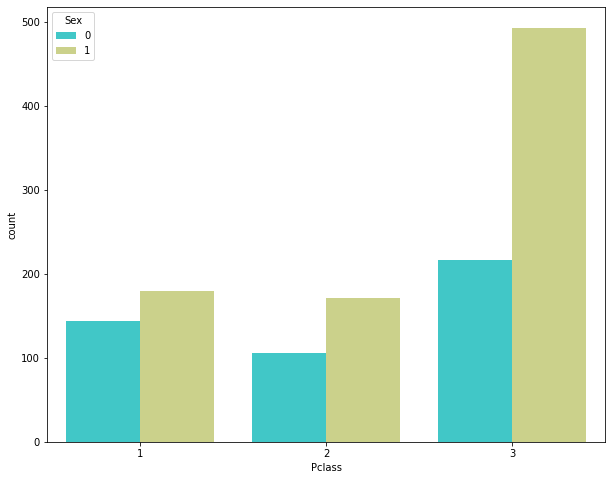

In [24]:
# plot showing the count of male(1) and female(0) in the three classes
plt.figure(figsize=(10,8))
sns.countplot(x='Pclass',data= combined, palette='rainbow', hue= 'Sex')

In [25]:
combined.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
dtype: int64

In [26]:
# checking skewness value 
skewnessAge = combined["Age"].skew()
skewnessFare =combined["Fare"].skew()

print(skewnessAge)
print(skewnessFare)

0.40767455974362266
4.367709134122922


A positive skewness value indicates that the tail on the positive side of the probability density function is longer or fatter. A skewness value of 0 indicates that the data is perfectly symmetric, but this is not always the case, skewness can be close to zero while the data is still not symmetric. So i go ahead to plot histograms to access some of the features.

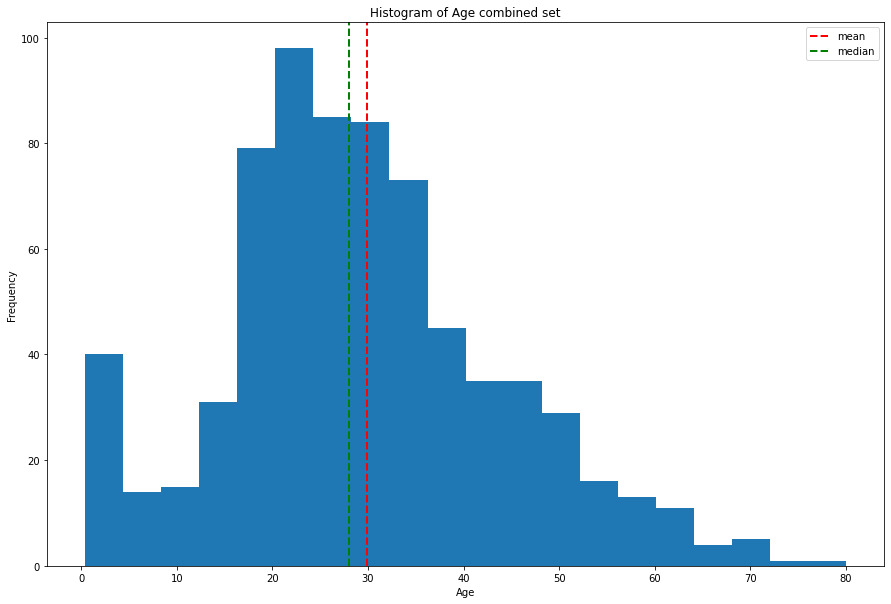

In [27]:
# Compute the mean and median of the column
mean = combined["Age"].mean()
median = combined["Age"].median()

# Plot a histogram of the column
plt.figure(figsize=(15,10))
plt.hist(train["Age"], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age combined set')
plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(median, color='g', linestyle='dashed', linewidth=2, label='median')
plt.legend()
plt.show()

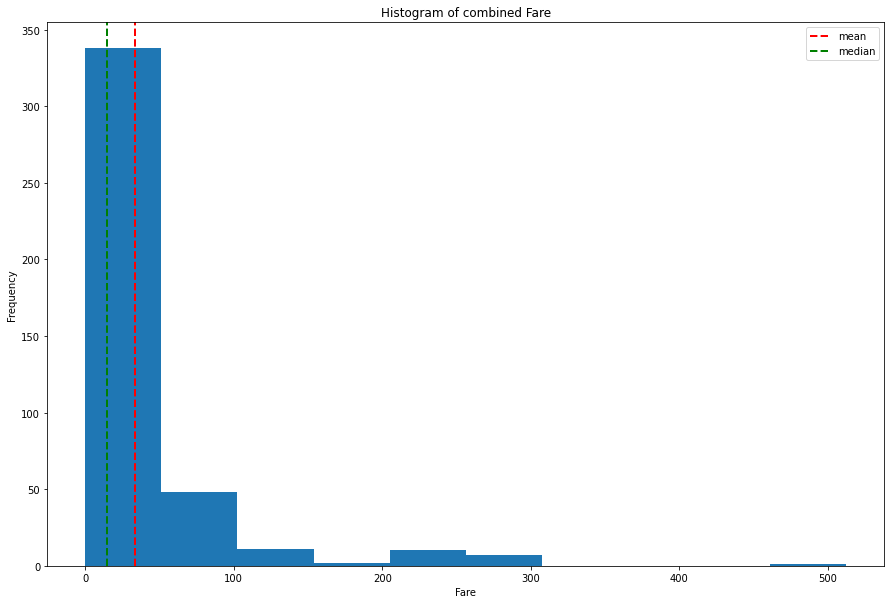

In [28]:
# Compute the mean and median of the column
mean_ = combined["Fare"].mean()
median_ = combined["Fare"].median()

# Plot a histogram of the column
plt.figure(figsize=(15,10))
plt.hist(test["Fare"])
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of combined Fare')
plt.axvline(mean_, color='r', linestyle='dashed', linewidth=2, label='mean')
plt.axvline(median_, color='g', linestyle='dashed', linewidth=2, label='median')
plt.legend()
plt.show()

The histograms for fare and age indicate that our data is skewed to the right. In this case, i will replace the missing values with the median observation. Also, since Embarked column has 2 missing values and it is a categorical column, i will replace it with the most frequent observation.

In [29]:
# Imputers

imp_age = IterativeImputer(max_iter=200, random_state=34, n_nearest_features=3)
imp_fare = SimpleImputer(missing_values=np.nan, strategy = "median")

# Multiple imputation for Age
combined["Age"] = np.round(imp_age.fit_transform(combined[["Age"]]))


# median Imputation for fare
combined["Fare"] = imp_fare.fit_transform(combined[["Fare"]])


In [30]:
#combined=pd.get_dummies(combined, columns=[ "SibSp"])
#combined


In [31]:
# splitting the combined datasets back to train and test
combined_train = combined.head(891)
combined_test = combined.tail(418)


In [32]:
# calculating the survival rate for both male and female
male_survived = combined_train[(combined_train['Survived'] == 1) & (combined_train['Sex'] == 1)]
female_survived = combined_train[(combined_train['Survived'] == 1) & (combined_train['Sex'] == 0)]

total_male = combined_train[combined_train['Sex'] == 1].shape[0]
total_female = combined_train[combined_train['Sex'] == 0].shape[0]

male_survival_rate = (len(male_survived)/ total_male) * 100
female_survival_rate = (len(female_survived)/ total_female) * 100
print(male_survival_rate)
print(female_survival_rate)

18.890814558058924
74.20382165605095


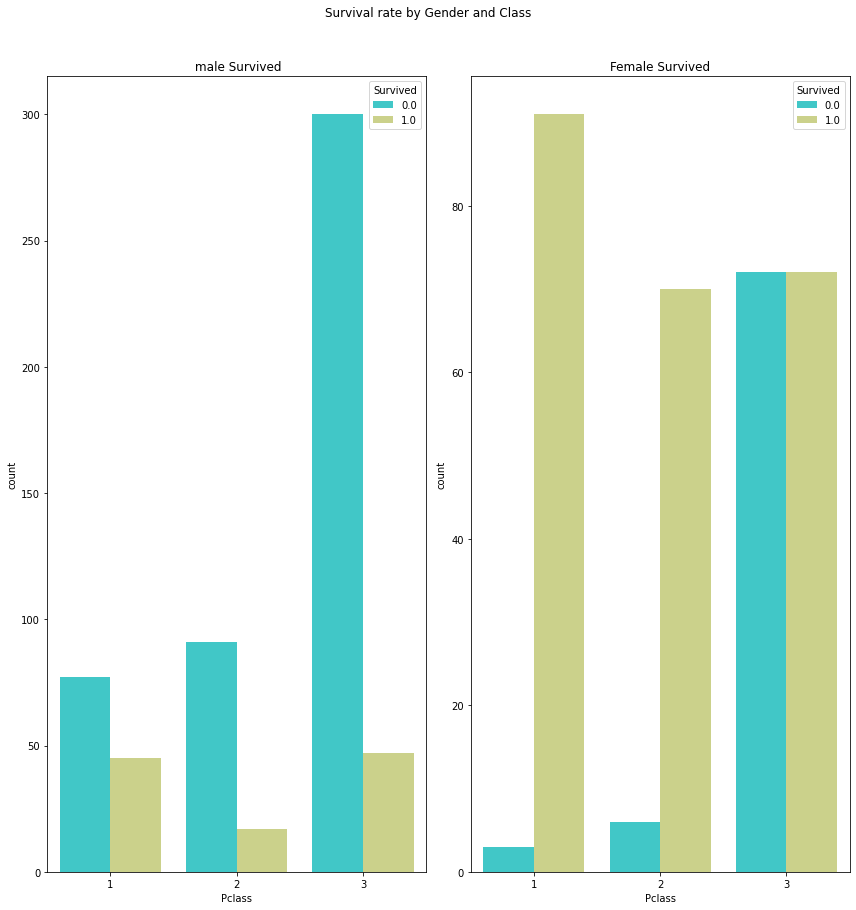

In [33]:
# plot showing the survival rate for both male and female in each class
male_train = combined_train[combined_train['Sex'] == 1]
female_train = combined_train[combined_train['Sex'] == 0]
fig,ax = plt.subplots(1,2,figsize=(12,12))

sns.countplot(x='Pclass',data=male_train, palette='rainbow',hue='Survived',ax=ax[0])
ax[0].set_title(" male Survived")
sns.countplot(x='Pclass',data=female_train, palette='rainbow',hue='Survived',ax=ax[1])
ax[1].set_title("Female Survived")

fig.suptitle("Survival rate by Gender and Class", y=1.05)
fig.tight_layout()

<ipython-input-34-232b496d2d59>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  corr.combined_train = combined_train.corr()


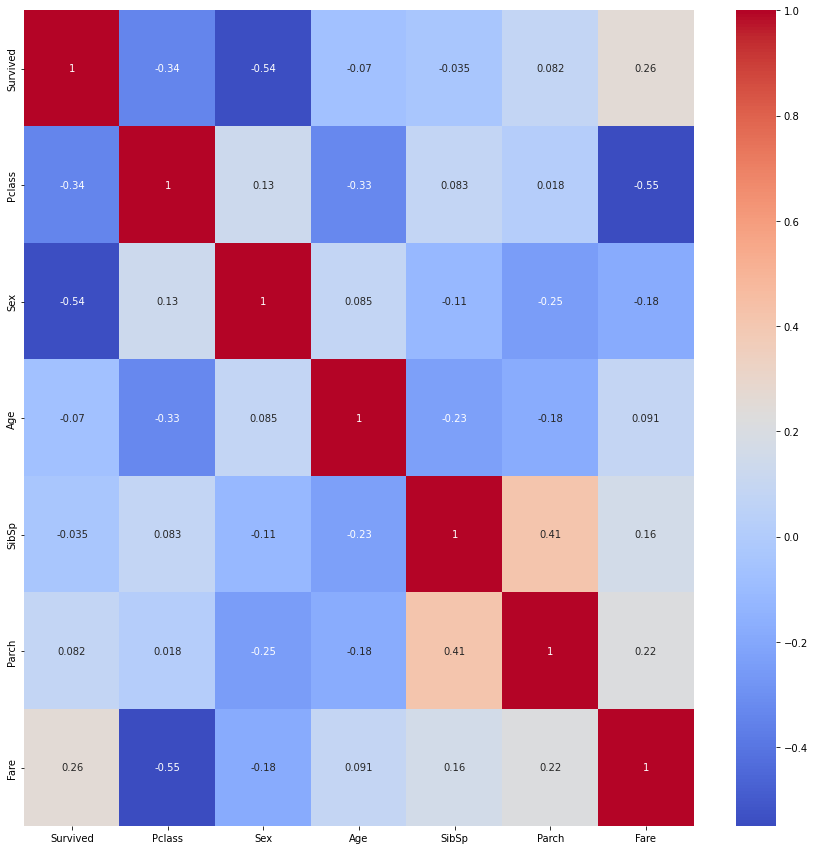

In [34]:
# correlation plot showing the relationship between survived and the remaing features.
corr.combined_train = combined_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr.combined_train, annot=True, cmap="coolwarm")



In [35]:
# wrapper method for feature selection using Recursive feature elimination with cross validation.

# Create a logistic regression model
model1 = LogisticRegression()

# scale the data
X_train_scaled = scaler.fit_transform(combined_train.drop('Survived',axis=1))
# Create the RFECV object and perform feature selection
selector = RFECV(estimator=model1, step=1, cv=3)
selector = selector.fit(X_train_scaled, combined_train["Survived"])

# Print the selected features
print(selector.support_)

[ True  True  True  True False False]


- Wrapper methods are a type of feature selection technique that evaluates subsets of features by training a model and evaluating its performance. The selector.support_ attribute returns a Boolean array indicating which features have been selected by the RFECV feature selection method. The True values correspond to the selected features and the False values correspond to the unselected features.
- And from above, Pclass, Sex, Age and SibSp were the selected features


In [36]:
# Get the selected features
X_selected = combined_train.drop('Survived',axis=1).values[:, selector.support_]


# Split the data into training and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X_selected, combined_train["Survived"], test_size=0.2, random_state=42)

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X2_train)

# Transform the training and test data
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

# Fit the model to the training data
model1.fit(X2_train, y2_train)

# Predict on test set
y2_pred = model1.predict(X2_test)

# Evaluate the model's performance using accuracy score
acc = accuracy_score(y2_test, y2_pred)
print(f"Accuracy of the model is: {acc:.2f}")


Accuracy of the model is: 0.81


In [37]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.84       105
         1.0       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [38]:
# printing the confusion matrix
confusion_matrix(y2_test, y2_pred)

array([[90, 15],
       [19, 55]])

True positive: 90 (We predicted a positive result and it was positive)
True negative: 55 (We predicted a negative result and it was negative)
False positive: 15 (We predicted a positive result and it was negative)
False negative: 19 (We predicted a negative result and it was positive)